In [1]:
library(ggplot2)
set.seed(1)

Warning message:
“package ‘ggplot2’ was built under R version 3.5.2”

# Section A. Model Complexity and Model Selection

We start by loading the datasets that is required in this task and split them into features/variables and targets/labels.

In [2]:
train = read.csv("assignment1_datasets/Task1A_train.csv")
test = read.csv("assignment1_datasets/Task1A_test.csv")

In [3]:
train_features = as.matrix(train[,1])
train_target = as.matrix(train[,2])
test_features = as.matrix(test[,1])
test_target = as.matrix(test[,2])

## Question 2 [L-fold Cross Validation]

### I
The module below is an auxiliary function that uses KNN regression to predict the taget variable.

In [4]:
knn <- function(train_features, train_target, test_features, k=4){
    train_len = nrow(train_features)
    test_len = nrow(test_features)
    prediction = c(1:nrow(test_features))*0

    
    distance = as.matrix(dist(rbind(test_features, train_features), method= "euclidean"))
    distance = distance[1:test_len,(test_len+1):(train_len+test_len)]
    
    for (i in 1:test_len){
        closest_index = as.data.frame(sort(distance[i,],index.return = TRUE))[1:k,2]
        prediction[i] = mean(train_target[closest_index])
    }
    
    return(as.matrix(prediction))
    
}

The module below is used to calculate the mean squared error.

In [5]:
calculate_error <- function(y,ypredict){
    mse = mean((y-ypredict)**2)
    return(mse)
}

The module below is an implementation of L-fold cross validation. It takes in training features and training target along with K value and number of fold to return the errors for different values of K

In [6]:
cv <- function(train_features,train_target,K, numFold =10){
    error = c(1:numFold)*0
    ind <- sample(1:nrow(train_features),nrow(train_features))
    folds <- cut(seq(1,length(ind)),breaks=numFold,labels=FALSE)
    for (i in c(1:numFold)){
        fold_i = which(folds %in% i)
        index = ind[fold_i]
        train_features_i = as.matrix(train_features[-index])
        train_target_i = as.matrix(train_target[-index])
        test_features_i = as.matrix(train_features[index])
        test_target_i = as.matrix(train_target[index])
        prediction = knn(train_features_i,train_target_i,test_features_i,k=K)
        error[i] = calculate_error(test_target_i,prediction)
    }

    return(mean(error))
}

## II

The cell below evaluates the error fro different values of K to find the optimal value.

In [7]:
errors = data.frame('K'=1:15,"Error"=1:15)
for (k in c(1:15)){
    error = cv(train_features,train_target,K=k, numFold = 10)
    errors[k,"Error"] = error
}

The cell below is used to plot the average error v/s the value of K chosen. To save the plot to the directory uncomment the two functions.

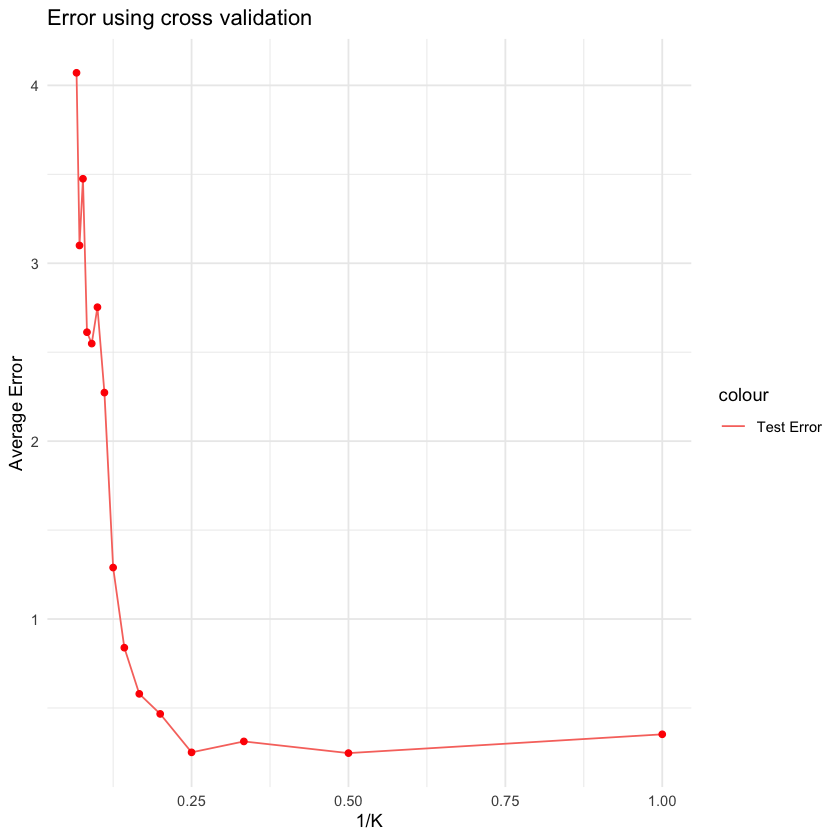

In [8]:
# jpeg('train_test_error.jpg',width = 1200, height = 350)

ggplot(data=errors,aes(x = 1/K))+geom_line(aes(y = Error,color = "Test Error")) +
    geom_point(aes(y = Error),color = "red") +
    ggtitle('Error using cross validation') + theme_minimal() + ylab("Average Error")
# dev.off()

### III

From the plot above we can observe that the mean error for the validation set was least when the value of K was set to 4 (corresponding to value of 1/K to 0.25). This is interesting because using the train set only for question 1 we observed that the value of K was 1 which corresponded to the lowest error. Here again, by using the train set only, we see that the value of 4 more close to the optimal value